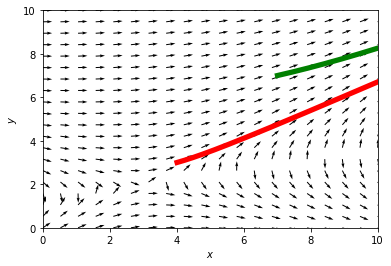

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
fig = plt.figure(num=1)
ax=fig.add_subplot(111)
## Vector field functionn
def vf(t,x):
  dx=np.zeros(2)
  dx[0]=1
  dx[1]= ((2*x[0])+x[1]-8)/((-2*x[0])+(9*x[1])-12)
#X[0] is x and x[1] is y
  return dx

#Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)
ic=[[4,3],[7,7]]
color=['r','g']
for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 5.25)

#Vector field
X,Y = np.meshgrid( np.linspace(0,10,20),np.linspace(0,10,20) )
U = 1
V = ((2*X)+Y-8)/((-2*X)+(9*Y)-12)

#Normalize arrows
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)
#u2 and v2 are in charge of creating the module of the vectors.


plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [32]:
#To find the constants.
import math
import numpy as np
levels_solution= []
x=4
y=3
C= ((np.log(((3*y)-(2*x))/((3*x)-9)))**4)+np.log(((3*y)+x-9)/((3*x)-9))-np.log(x-3)
print('C value is',C)
levels_solution.append(C)
x=7
y=7
C1= ((np.log(((3*y)-(2*x))/((3*x)-9)))**4)+np.log(((3*y)+x-9)/((3*x)-9))-np.log(x-3)
print('C1 value is',C1)
levels_solution.append(C1)

C value is 1.7444078664583529
C1 value is -0.842361772091644


In [33]:
## Levels we are interested to compare solution from gradient field
print(levels_solution)
levels=sorted(levels_solution)
print(levels)## Ordenado para plotear las contour curves

[1.7444078664583529, -0.842361772091644]
[-0.842361772091644, 1.7444078664583529]


C:\Users\Lucia Garcia Gonzale\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


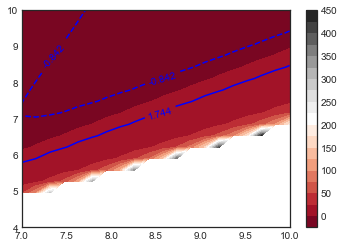

In [34]:
#I have integrate to find y_exact but we see that it is impossible to find y, it is implicit. So we decide to do contour curves.
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

xs = np.linspace(7,10, 20)
ys = np.linspace(4,10, 20)

def fs(xs, ys): #y_exact equation without constant
    return ((np.log(((3*ys)-(2*xs))/((3*xs)-9)))**4)+np.log(((3*ys)+xs-9)/((3*xs)-9))-np.log(xs-3)



X, Y = np.meshgrid(xs, ys)

Z = fs(X,Y)

contours = plt.contour(X, Y, Z, levels, colors='blue')
plt.clabel(contours, inline=1, fontsize=10)

plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()